In [1]:
from smach_utils_receptionist import *
import matplotlib.pyplot as plt



ModuleNotFoundError: No module named 'smach'

In [2]:
res = omni_base.move_base(known_location='beverage_area',timeout=20)
if res:
    voice.talk("I will check if there is coke here")
else:
    voice.talk('Navigation Failed, retrying')
print(res)

NameError: name 'omni_base' is not defined

In [3]:
rospy.loginfo('STATE : INITIAL')
rospy.loginfo(f'Try of 5 attempts')
party.clean_knowledge(host_name = "john", host_location = "Place_3")
#party.publish_tf_seats()
places_2_tf()

###-----INIT GRAMMAR FOR VOSK
###-----Use with get_keywords_speech()
###-----------SPEECH REC
#drinks=['coke','juice','beer', 'water', 'soda', 'wine', 'i want a', 'i would like a']
#drinks = ['coke','juice','milk', 'water', 'soda', 'wine', 
#          'i want a', 'i would like a', 'tea', 'icedtea', 'cola', 'redwine', 'orangejuice', 'tropicaljuice']
drinks = ['water', 'soda', 'coke', 'juice', 'iced tea', 'i want a', 'i would like a']
#names=['rebeca','ana','jack', 'michael', ' my name is' , 'i am','george','mary','ruben','oscar','yolo','mitzi']
#names = [' my name is' , 'i am','adel', 'angel', 'axel', 
#         'charlie', 'jane', 'john', 'jules', 'morgan', 'paris', 'robin', 'simone', 'jack']
names = ['my name is', 'i am','john', 'jack', 'paris', 'charlie', 'simone', 'robin', 'jane', 'jules']
confirmation = ['yes','no', 'robot yes', 'robot no','not','now','nope','yeah']                     
gram = drinks + names + confirmation                                                                                



[INFO] [1742851833.662794]: STATE : INITIAL
[INFO] [1742851833.675649]: Try of 5 attempts
Place_1 [-0.33, -1.7, -0.05]
Place_2 [-0.82, -1.61, -1.51]
Place_3 [-1.12, -0.45, 3.1]


In [4]:
rospy.loginfo('STATE : navigate to known beverage area')
print('Try of 3 attempts')
# voice.talk('Navigating to ,living room')
#res = omni_base.move_base(known_location='beverage_area')


[INFO] [1742851840.243937]: STATE : navigate to known beverage area
Try of 3 attempts


In [5]:
set_grammar(gram)
print("True")

True


In [15]:
voice.talk('Scanning table')
head.set_joint_values([0.0, -0.3])

favorite_drink = "lipton"
res,position = get_favorite_drink_location(favorite_drink)

if res:
    voice.talk(f"I found a {favorite_drink} on the {position}, take it please.")
else:
    voice.talk(f'There is no {favorite_drink}, if you want to, take another one.')

[INFO] [1742852201.382057]: Nube de puntos recibida. Enviando solicitud de segmentación...
Message Received
Result: right for drink: lipton


In [2]:
favorite_drink = "person"
res,position = get_favorite_drink_location(favorite_drink)


[INFO] [1747358390.566973, 103.441000]: Nube de puntos recibida. Enviando solicitud de segmentación...


KeyboardInterrupt: 

In [3]:
rospy.wait_for_service('grounding_dino_detect')

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

In [5]:
classify_client_dino = rospy.ServiceProxy('grounding_dino_detect', Classify_dino)


In [10]:
img=rgbd.get_image()
#cv2.imwrite('img.png',img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Convert image to ROS format
ros_image = bridge.cv2_to_imgmsg(img, encoding="bgr8")

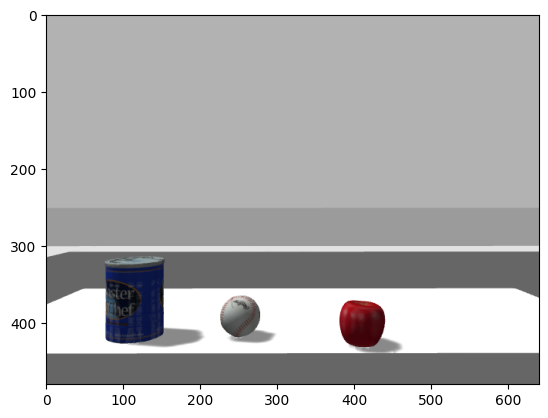

In [11]:
img=rgbd.get_image()

plt.imshow(img)

In [104]:
img=rgbd.get_image()
prompt_msg = String()
prompt_msg.data = 'objects'
ros_image = bridge.cv2_to_imgmsg(img, encoding="bgr8")
response = classify_client_dino(ros_image, prompt_msg)

In [105]:
debug_image = bridge.imgmsg_to_cv2(response.image, desired_encoding="rgb8")

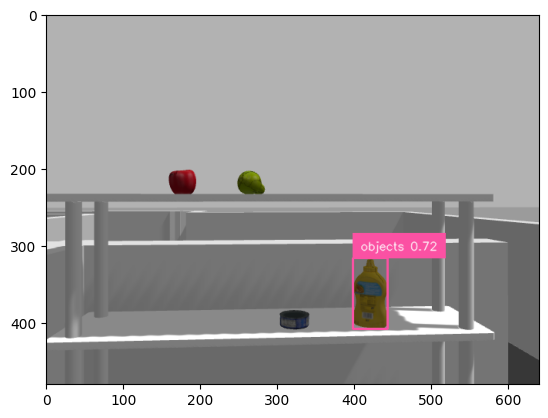

In [106]:

plt.imshow(debug_image)

In [24]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image



         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

In [107]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


In [108]:
img=rgbd.get_image()

pil_image = Image.fromarray(img)

In [109]:
# Generate caption
inputs = processor(images=pil_image, return_tensors="pt")
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)

print("Caption:", caption)

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

Caption: a white shelf with a bottle and a bottle of liquid


In [110]:
from transformers import BlipProcessor, BlipForQuestionAnswering

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")


In [163]:
# Ask your question
img=rgbd.get_image()

pil_image = Image.fromarray(img)
question = "which is the brightest tool on the table?"
# Run inference
inputs = processor(images=pil_image, text=question, return_tensors="pt")
out = model.generate(**inputs)
answer = processor.decode(out[0], skip_special_tokens=True)

print("Answer:", answer)


Answer: banana


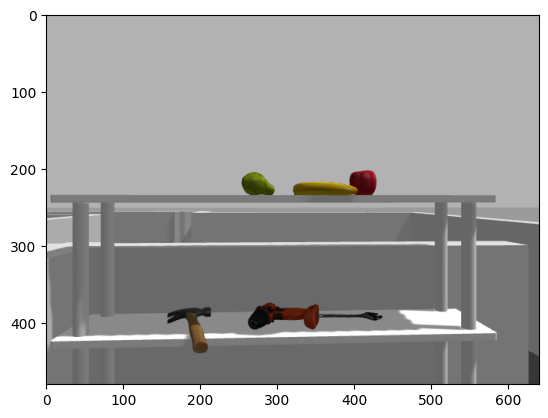

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/ros-noetic-tf2-0.7.7/src/buffer_core.cpp
         at line 278 in /tmp/binarydeb/r

In [164]:
plt.imshow (img)

In [170]:
classify_client = rospy.ServiceProxy('/classify', Classify)             #YOLO OBJ RECOG


In [165]:
rospack = rospkg.RosPack()        
file_path = rospack.get_path('config_files') 
objs = pd.read_csv (file_path+'/objects.csv') #EMPTY DATAFRAME
objs=objs.drop(columns='Unnamed: 0')

In [166]:
objs

,x,y,z,obj_name


In [174]:
head.set_joint_values([ 0.0, -0.5])
rospy.sleep(5.0)
img_msg  = bridge.cv2_to_imgmsg( cv2.cvtColor(rgbd.get_image(), cv2.COLOR_RGB2BGR))### GAZEBO BGR!?!??!
req      = classify_client.request_class()
req.in_.image_msgs.append(img_msg)        
res      = classify_client(req)
objects, poses=detect_object_yolo('all',res)   

['softball', 'tennis_ball', 'a_cups', 'mug', 'large_clamp', 'a_toy_airplane'] [position: 
  x: -0.21088464558124542
  y: 0.07783455401659012
  z: 1.336193323135376
orientation: 
  x: 0.0
  y: 0.0
  z: 0.0
  w: 1.0, position: 
  x: 0.3785858154296875
  y: 0.05323930084705353
  z: 1.4134739637374878
orientation: 
  x: 0.0
  y: 0.0
  z: 0.0
  w: 1.0, position: 
  x: -0.245997354388237
  y: -0.1522146463394165
  z: 1.0599746704101562
orientation: 
  x: 0.0
  y: 0.0
  z: 0.0
  w: 1.0, position: 
  x: -0.0802849754691124
  y: -0.24440421164035797
  z: 1.1891989707946777
orientation: 
  x: 0.0
  y: 0.0
  z: 0.0
  w: 1.0, position: 
  x: -0.3212229311466217
  y: -0.25994059443473816
  z: 1.2409539222717285
orientation: 
  x: 0.0
  y: 0.0
  z: 0.0
  w: 1.0, position: 
  x: 0.5131672024726868
  y: 0.25584372878074646
  z: 1.4619148969650269
orientation: 
  x: 0.0
  y: 0.0
  z: 0.0
  w: 1.0]


In [177]:
objects

['softball', 'tennis_ball', 'a_cups', 'mug', 'large_clamp', 'a_toy_airplane']

In [187]:
cats=[]
for name in objects:cats.append(categorize_objs(name))
count = cats.count('balls')
print(count)


2


In [173]:
def detect_object_yolo(object_name,res):
    # find object_name in the response message from object_classification service (Yolo)
    objs=[]
    poses=[]
    for i,name in enumerate(res.names):
        if res.poses[i].position.x is not np.nan :
            objs.append(name.data[4:])
            poses.append(res.poses[i])
        if name.data[4:]==object_name:return name.data[4:], res.poses[i]
    if object_name=='all':
        print (objs, poses)
        return objs , poses
    return [],[]

In [184]:
def categorize_objs(name):
    kitchen =['bowl','spatula','spoon', 'bowl','plate','f_cups','h_cups']
    tools=['extra_large_clamp','large_clamp','small_clamp','medium_clamp','adjustable_wrench','flat_screwdriver','phillips_screwdriver','wood_block']
    balls= ['softball','tennis_ball','a_mini_soccer_ball', 'racquetball', 'golf_ball', 'baseball'  ]
    fruits= ['apple','banana', 'lemon','pear','plum','orange','strawberry','peach']
    food =['chips_can','mustard_bottle','potted_meat_can','tomato_soup_can','tuna_fish_can','master_chef_can','sugar_box','pudding_box','cracker_box', 'gelatin_box']
    toys=['a_toy_airplane']
    if name in kitchen: return 'kitchen'
    elif name in tools: return 'tools'
    elif name in balls: return 'balls'
    elif name in fruits: return 'fruits'
    elif name in food: return 'food'
    elif name in toys: return 'toys'
    return 'other'